In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.shape

(200000, 202)

In [3]:
import matplotlib as plt

train['var_0'].hist(bins = 100)

In [129]:

col = train['var_0']

num_list = col.value_counts()
list_summary = num_list.describe()
ul3 = num_list.std()*3 + num_list.mean()
print('Mean: ',round(num_list.mean(),1))
print('Upper 3 std above mean: ',round(ul3,1))

df = num_list.value_counts()

col_min = col.values.min()
col_max = col.values.max()
col_range = col_max - col_min

print('Min: ',col_min,'    Max: ', col_max,'    Range: ', col_range)

df = df.rename_axis('Occurances').reset_index(name='Counts')

count_sum = df['Counts'].sum()
row_count = len(train.index)
print('Total different unique values: ',count_sum, '    % of Total: ',count_sum/row_count)
df['%'] = df['Counts']/count_sum
df['cumsum'] =df['%'].cumsum()
print(df)


Mean:  2.1
Upper 3 std above mean:  6.0
Min:  0.4084     Max:  20.315     Range:  19.9066
Total different unique values:  94672     % of Total:  0.47336
    Occurances  Counts         %    cumsum
0            1   40355  0.426261  0.426261
1            2   25627  0.270692  0.696954
2            3   15220  0.160766  0.857719
3            4    7791  0.082295  0.940014
4            5    3544  0.037435  0.977448
5            6    1397  0.014756  0.992205
6            7     526  0.005556  0.997761
7            8     145  0.001532  0.999292
8            9      50  0.000528  0.999820
9           10      14  0.000148  0.999968
10          11       3  0.000032  1.000000


In [144]:
df2 = pd.DataFrame({'Var': [], 'Range': [], 'Unique % of Total': [],
                    'Mean Count': [],'Std Count': [],'cumsum count 1': []})
for i in range(5):
    v = 'var_'
    var_x = v+str(i)
    col =train[var_x]
    col_min = col.values.min()
    col_max = col.values.max()
    col_range = col_max - col_min
    
    num_list = col.value_counts()
    list_summary = num_list.describe()
    ul3 = num_list.std()*3 + num_list.mean()
    df = num_list.value_counts()
    df = df.rename_axis('Occurances').reset_index(name='Counts')
    count_sum = df['Counts'].sum()
    row_count = len(train.index)
    df['%'] = df['Counts']/count_sum
    df['cumsum'] =df['%'].cumsum()

    
    df2 = df2.append({'Var': var_x, 'Range': col_range, 
                      'Unique % of Total': count_sum/row_count,
                      'Mean Count': 
                     'cumsum count 1': df.iloc[1,3]},
                     ignore_index=True)
    
print(df2)

     Var    Range  Unique % of Total  cumsum count 1
0  var_0  19.9066           0.473360        0.696954
1  var_1  25.4202           0.544660        0.783599
2  var_2  17.2359           0.432775        0.641580
3  var_3  13.2285           0.372985        0.544003
4  var_4  11.5966           0.317575        0.453389


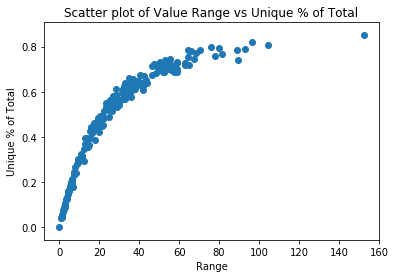

In [41]:
import matplotlib.pyplot as plt
plt.scatter(df2['Range'],df2['Unique % of Total'])
plt.title('Scatter plot of Value Range vs Unique % of Total')
plt.xlabel('Range')
plt.ylabel('Unique % of Total')
plt.show()